In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import the data
train = pd.read_csv("Train Dataset .csv")
test = pd.read_csv("Test Dataset.csv")
train.head()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1


In [3]:
test.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,16501,70,1,0,163,495,0,2,170,1,2.0,1,0,1
1,10444,61,1,0,131,238,0,2,74,1,4.9,2,2,2
2,14288,53,1,0,95,558,1,1,73,1,0.7,1,1,0
3,10409,37,0,1,178,287,0,1,192,1,5.7,1,0,0
4,17330,35,0,3,104,281,0,0,122,0,1.3,1,4,3


In [4]:
variables = pd.read_csv("Variable_Definitions.csv")
variables

,Variable defination
0,age
1,sex
2,chest pain type (4 values)
3,resting blood pressure
4,serum cholestoral in mg/dl
5,fasting blood sugar > 120 mg/dl
6,resting electrocardiographic results (values 0...
7,maximum heart rate achieved
8,exercise induced angina
9,oldpeak = ST depression induced by exercise re...


In [5]:
#reset the index for the data
train.set_index("Id", inplace=True)

In [6]:
test.set_index("id", inplace=True)

In [7]:
#check for missing values
train.isna().sum()

Age         0
Sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
test.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [9]:
#check for duplicated values
train.duplicated().sum()

0

In [10]:
test.duplicated().sum()

0

In [11]:
#describe the data
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,7303.0,53.172669,14.185970,29.0,41.0,53.0,65.0,77.0
Sex,7303.0,0.499658,0.500034,0.0,0.0,0.0,1.0,1.0
cp,7303.0,1.502533,1.115594,0.0,1.0,1.0,3.0,3.0
trestbps,7303.0,147.447487,31.099538,94.0,120.0,148.0,174.0,200.0
chol,7303.0,342.805970,127.291998,126.0,231.0,341.0,450.0,564.0
fbs,7303.0,0.493085,0.499986,0.0,0.0,0.0,1.0,1.0
restecg,7303.0,1.013008,0.815806,0.0,0.0,1.0,2.0,2.0
thalach,7303.0,136.506093,38.141966,71.0,104.0,137.0,170.0,202.0
exang,7303.0,0.503218,0.500024,0.0,0.0,1.0,1.0,1.0
oldpeak,7303.0,3.129851,1.791160,0.0,1.6,3.1,4.7,6.2


In [12]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
age,2697.0,53.064516,14.350978,29.0,41.0,53.0,66.0,77.0
sex,2697.0,0.488691,0.499965,0.0,0.0,0.0,1.0,1.0
cp,2697.0,1.504264,1.112747,0.0,1.0,1.0,3.0,3.0
trestbps,2697.0,146.384872,30.640580,94.0,121.0,147.0,172.0,200.0
chol,2697.0,344.027809,127.265038,126.0,233.0,344.0,455.0,564.0
fbs,2697.0,0.497219,0.500085,0.0,0.0,0.0,1.0,1.0
restecg,2697.0,1.021135,0.811590,0.0,0.0,1.0,2.0,2.0
thalach,2697.0,135.993326,38.419913,71.0,103.0,136.0,170.0,202.0
exang,2697.0,0.484613,0.499856,0.0,0.0,0.0,1.0,1.0
oldpeak,2697.0,3.142714,1.810003,0.0,1.6,3.2,4.7,6.2


In [13]:
#get info on rhw data
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7303 entries, 16167 to 15363
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       7303 non-null   int64  
 1   Sex       7303 non-null   int64  
 2   cp        7303 non-null   int64  
 3   trestbps  7303 non-null   int64  
 4   chol      7303 non-null   int64  
 5   fbs       7303 non-null   int64  
 6   restecg   7303 non-null   int64  
 7   thalach   7303 non-null   int64  
 8   exang     7303 non-null   int64  
 9   oldpeak   7303 non-null   float64
 10  slope     7303 non-null   int64  
 11  ca        7303 non-null   int64  
 12  thal      7303 non-null   int64  
 13  target    7303 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 855.8 KB


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2697 entries, 16501 to 17660
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2697 non-null   int64  
 1   sex       2697 non-null   int64  
 2   cp        2697 non-null   int64  
 3   trestbps  2697 non-null   int64  
 4   chol      2697 non-null   int64  
 5   fbs       2697 non-null   int64  
 6   restecg   2697 non-null   int64  
 7   thalach   2697 non-null   int64  
 8   exang     2697 non-null   int64  
 9   oldpeak   2697 non-null   float64
 10  slope     2697 non-null   int64  
 11  ca        2697 non-null   int64  
 12  thal      2697 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 295.0 KB


In [15]:
#checking the shape of the data
train.shape

(7303, 14)

In [16]:
test.shape

(2697, 13)

In [17]:
#check for the number of unqune values in the data
train.nunique()

Age          49
Sex           2
cp            4
trestbps    107
chol        439
fbs           2
restecg       3
thalach     132
exang         2
oldpeak      63
slope         3
ca            5
thal          4
target        2
dtype: int64

In [18]:
test.nunique()

age          49
sex           2
cp            4
trestbps    107
chol        437
fbs           2
restecg       3
thalach     132
exang         2
oldpeak      63
slope         3
ca            5
thal          4
dtype: int64

Exploratory Data Analysis

Drop Faulty data

In [ ]:
#in the train data
train = train[train['ca'] < 4] #include only ca values less than 4
train = train[train['thal'] > 0] 

#for the test data
test = test[test['ca'] < 4] #include only ca values less than 4
test = test[test['thal'] > 0]


rename features

In [ ]:
#for train
train = train.rename(
    columns = {'cp':'chest_pain_type', 
               'trestbps':'resting_blood_pressure', 
               'chol': 'cholesterol',
               'fbs': 'fasting_blood_sugar',
               'restecg' : 'resting_electrocardiogram', 
               'thalach': 'max_heart_rate_achieved', 
               'exang': 'exercise_induced_angina',
               'oldpeak': 'st_depression', 
               'slope': 'st_slope', 
               'ca':'num_major_vessels', 
               'thal': 'thalassemia'}, 
    errors="raise", inplace=True)

#for test
test = test.rename(
    columns = {'cp':'chest_pain_type', 
               'trestbps':'resting_blood_pressure', 
               'chol': 'cholesterol',
               'fbs': 'fasting_blood_sugar',
               'restecg' : 'resting_electrocardiogram', 
               'thalach': 'max_heart_rate_achieved', 
               'exang': 'exercise_induced_angina',
               'oldpeak': 'st_depression', 
               'slope': 'st_slope', 
               'ca':'num_major_vessels', 
               'thal': 'thalassemia',
               "age":"Age", 
               "sex":"Sex" },
    errors="raise", inplace=True)

data preprocessing

In [ ]:
#for train
train['sex'][train['sex'] == 0] = 'female'
train['sex'][train['sex'] == 1] = 'male'

train['chest_pain_type'][train['chest_pain_type'] == 0] = 'typical angina'
train['chest_pain_type'][train['chest_pain_type'] == 1] = 'atypical angina'
train['chest_pain_type'][train['chest_pain_type'] == 2] = 'non-anginal pain'
train['chest_pain_type'][train['chest_pain_type'] == 3] = 'asymptomatic'

train['fasting_blood_sugar'][train['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
train['fasting_blood_sugar'][train['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

train['resting_electrocardiogram'][train['resting_electrocardiogram'] == 0] = 'normal'
train['resting_electrocardiogram'][train['resting_electrocardiogram'] == 1] = 'ST-T wave abnormality'
train['resting_electrocardiogram'][train['resting_electrocardiogram'] == 2] = 'left ventricular hypertrophy'

train['exercise_induced_angina'][train['exercise_induced_angina'] == 0] = 'no'
train['exercise_induced_angina'][train['exercise_induced_angina'] == 1] = 'yes'

train['st_slope'][train['st_slope'] == 0] = 'upsloping'
train['st_slope'][train['st_slope'] == 1] = 'flat'
train['st_slope'][train['st_slope'] == 2] = 'downsloping'

train['thalassemia'][train['thalassemia'] == 1] = 'fixed defect'
train['thalassemia'][train['thalassemia'] == 2] = 'normal'
train['thalassemia'][train['thalassemia'] == 3] = 'reversable defect'

In [ ]:
#for test
test['sex'][test['sex'] == 0] = 'female'
test['sex'][test['sex'] == 1] = 'male'

test['chest_pain_type'][test['chest_pain_type'] == 0] = 'typical angina'
test['chest_pain_type'][test['chest_pain_type'] == 1] = 'atypical angina'
test['chest_pain_type'][test['chest_pain_type'] == 2] = 'non-anginal pain'
test['chest_pain_type'][test['chest_pain_type'] == 3] = 'asymptomatic'

test['fasting_blood_sugar'][test['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
test['fasting_blood_sugar'][test['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

test['resting_electrocardiogram'][test['resting_electrocardiogram'] == 0] = 'normal'
test['resting_electrocardiogram'][test['resting_electrocardiogram'] == 1] = 'ST-T wave abnormality'
test['resting_electrocardiogram'][test['resting_electrocardiogram'] == 2] = 'left ventricular hypertrophy'

test['exercise_induced_angina'][test['exercise_induced_angina'] == 0] = 'no'
test['exercise_induced_angina'][test['exercise_induced_angina'] == 1] = 'yes'

test['st_slope'][test['st_slope'] == 0] = 'upsloping'
test['st_slope'][test['st_slope'] == 1] = 'flat'
test['st_slope'][test['st_slope'] == 2] = 'downsloping'

test['thalassemia'][test['thalassemia'] == 1] = 'fixed defect'
test['thalassemia'][test['thalassemia'] == 2] = 'normal'
test['thalassemia'][test['thalassemia'] == 3] = 'reversable defect'

group features by datadata type

In [ ]:
# numerical fearures 6
num_feats = ['age', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'num_major_vessels']
# categorical (binary)
bin_feats = ['sex', 'fasting_blood_sugar', 'exercise_induced_angina', 'target']
# caterorical (multi-)
nom_feats= ['chest_pain_type', 'resting_electrocardiogram', 'st_slope', 'thalassemia']
cat_feats = nom_feats + bin_feats

Text(0.5, 1.0, 'Distribution of the target feature')

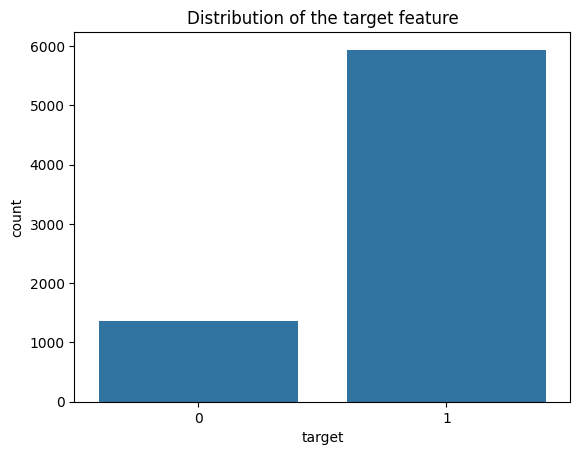

In [19]:
#checking out the distribution of the target variables
sns.countplot(train, x="target")
plt.title("Distribution of the target feature")

from the visualization above it is obvious that there is a class imbalance within the target feature which should be corrected before any prediction can take place

<Axes: xlabel='Sex', ylabel='count'>

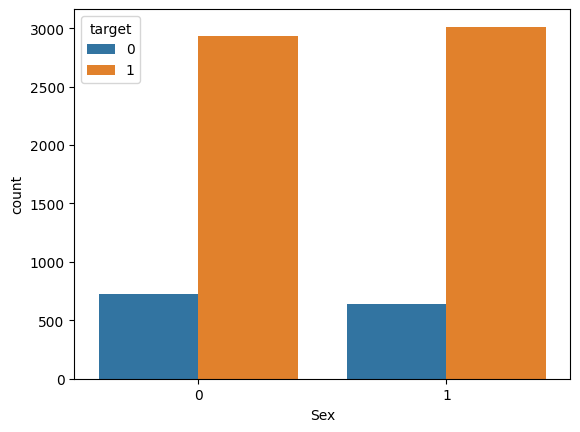

In [20]:
#check the gender distribution within the data
sns.countplot(train, x="Sex", hue="target")

<Axes: xlabel='sex', ylabel='count'>

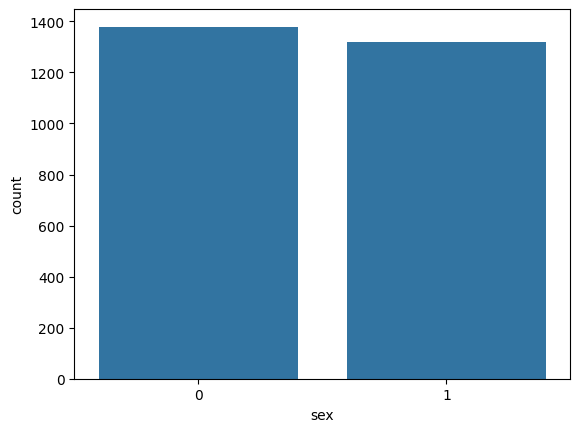

In [21]:
sns.countplot(test, x="sex")

Text(0.5, 0, 'Chest Pain')

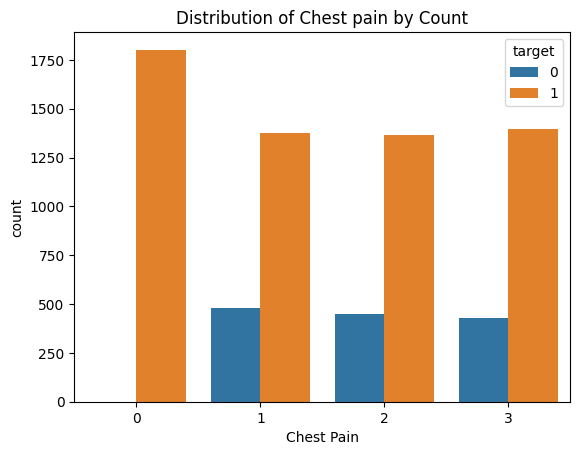

In [22]:
#catplot of chest pain against target
sns.countplot(data=train, x="cp", hue="target")
plt.title("Distribution of Chest pain by Count")
plt.xlabel("Chest Pain")

Text(0.5, 0, 'Heart Disease')

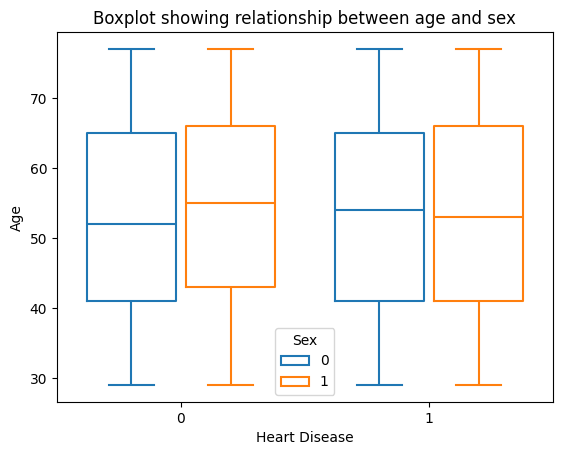

In [25]:
#boxplot
sns.boxplot(data=train, x="target", y="Age", hue="Sex", fill=False, gap=.1)
plt.title("Boxplot showing relationship between age and sex")
plt.ylabel("Age")
plt.xlabel("Heart Disease")

In [26]:
#separate the explanatory and the target variable
y_train = train["target"]
X_train = train.drop(columns=['target'], axis=1)
y_train.head()

Id
16167    1
11275    0
13251    1
19921    1
11293    1
Name: target, dtype: int64

In [27]:
X_train.head()

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
Id,,,,,,,,,,,,,
16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1
11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0
13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1
19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2
11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0


Feature Selection

In [29]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

selector = RFE(RandomForestClassifier(), n_features_to_select=10)
selector.fit(X_train, y_train)
X_train = selector.transform(X_train)

In [30]:
test = selector.transform(test)

Addressing the unbalanced target variable by resampling the data

In [31]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

In [32]:
#split the data
X_train, X_eval, y_train, y_eval = train_test_split(X_train, y_train, stratify=y_train, test_size=0.3)

In [33]:
#normalize the data
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_eval = scaler.fit_transform(X_eval)
scaled_X_train

array([[-0.51830546,  1.34141142, -1.61436132, ..., -1.2157678 ,
         1.4144489 , -0.43653605],
       [ 0.68149257, -0.45251799,  1.40670277, ..., -1.2157678 ,
         0.70248919,  1.359498  ],
       [-0.58888182,  1.34141142, -0.48949703, ...,  1.23930034,
         1.4144489 , -0.43653605],
       ...,
       [ 1.59898519, -1.3494827 ,  0.21756052, ...,  0.01176627,
         1.4144489 ,  0.46148097],
       [-1.22406901, -0.45251799,  0.2496995 , ..., -1.2157678 ,
        -0.72143022, -0.43653605],
       [-0.94176359, -1.3494827 , -1.42152744, ..., -1.2157678 ,
         1.4144489 ,  0.46148097]])

In [34]:
scaled_X_eval

array([[ 0.50842664, -0.44578443, -0.44937542, ..., -1.20749333,
        -0.72501661, -1.38611742],
       [-0.75791982,  0.44946185,  1.03207006, ...,  1.22190785,
         0.67950275,  1.31422336],
       [-0.05439401, -1.34103071,  0.13032064, ...,  0.00720726,
        -1.42727629, -1.38611742],
       ...,
       [-1.1800353 , -0.44578443, -0.19173273, ...,  1.22190785,
        -1.42727629,  1.31422336],
       [-0.40615691, -0.44578443,  1.48294477, ..., -1.20749333,
        -0.72501661, -0.48600383],
       [-1.10968272, -0.44578443,  0.93545405, ...,  1.22190785,
         0.67950275,  0.41410977]])

In [35]:

#normalize the test set
scaled_X_test = scaler.transform(test)
scaled_X_test

array([[ 1.21195245, -1.34103071,  0.48457934, ...,  0.00720726,
        -1.42727629, -0.48600383],
       [ 0.57877922, -1.34103071, -0.54599143, ...,  1.22190785,
        -0.02275693,  0.41410977],
       [ 0.01595857, -1.34103071, -1.70538354, ...,  0.00720726,
        -0.72501661, -1.38611742],
       ...,
       [-1.53179821, -1.34103071,  0.16252597, ..., -1.20749333,
         0.67950275, -0.48600383],
       [ 1.28230503, -1.34103071, -1.19009816, ..., -1.20749333,
        -0.72501661,  0.41410977],
       [-0.12474659,  1.34470813, -0.48158076, ...,  1.22190785,
        -0.02275693,  1.31422336]])

In [36]:
#resample the data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(scaled_X_train, y_train)

Train the model

In [37]:
#import the models
from sklearn.linear_model import  LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import StackingClassifier

In [38]:
#instantiate the models
naives_bayes = GaussianNB()
logreg = LogisticRegression(random_state=42, class_weight='balanced', solver='liblinear', max_iter=1000)
knn = KNeighborsClassifier(n_neighbors=5, weights='distance') #distance paramter gices closer neighbours more weight
svm = SVC(kernel='linear', random_state=42, class_weight='balanced')
decision_tree = DecisionTreeClassifier(random_state=42, class_weight="balanced")
bagging_dt = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42, class_weight="balanced"), n_estimators=50)
gradient_boost = GradientBoostingClassifier(random_state=42, learning_rate=0.1, n_estimators=100, max_depth=3)
adaboost = AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=42, class_weight="balanced", max_depth=1), n_estimators=50, learning_rate=1.0)
random_forest = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100, max_depth=10)
xgboost = XGBClassifier()
catboost = CatBoostClassifier(verbose=0)
lightgbm = LGBMClassifier(learning_rate=0.001)
linear = LinearRegression()

In [39]:
#fit the models
naives_bayes.fit(X_train_resampled, y_train_resampled)
logreg.fit(X_train_resampled, y_train_resampled)
knn.fit(X_train_resampled, y_train_resampled)
svm.fit(X_train_resampled, y_train_resampled)
decision_tree.fit(X_train_resampled, y_train_resampled)
bagging_dt.fit(X_train_resampled, y_train_resampled)
gradient_boost.fit(X_train_resampled, y_train_resampled)
adaboost.fit(X_train_resampled, y_train_resampled)
random_forest.fit(X_train_resampled, y_train_resampled)
xgboost.fit(X_train_resampled, y_train_resampled)
catboost.fit(X_train_resampled, y_train_resampled)
lightgbm.fit(X_train_resampled, y_train_resampled)
linear.fit(X_train_resampled, y_train_resampled)

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4159, number of negative: 4159
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000753 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2296
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LinearRegression()

In [40]:
#get predictions
naives_predict = naives_bayes.predict(scaled_X_eval)
logreg_predict = logreg.predict(scaled_X_eval)
knn_predict = knn.predict(scaled_X_eval)
svm_predict = svm.predict(scaled_X_eval)
dt_predict = decision_tree.predict(scaled_X_eval)
bagging_dt_predict = bagging_dt.predict(scaled_X_eval)
gb_predict = gradient_boost.predict(scaled_X_eval)
adaboost_predict = adaboost.predict(scaled_X_eval)
rf_predict = random_forest.predict(scaled_X_eval)
xgboost_predict = random_forest.predict(scaled_X_eval)
catboost_predict = random_forest.predict(scaled_X_eval)
lightgbm_predict = random_forest.predict(scaled_X_eval)
linear_predict = random_forest.predict(scaled_X_eval)

In [41]:
#model evaluation
navies_classification_report = classification_report(y_eval, naives_predict)
logreg_classification_report = classification_report(y_eval, logreg_predict)
knn_classification_report = classification_report(y_eval, knn_predict)
svm_classification_report = classification_report(y_eval, svm_predict)
dt_classification_report = classification_report(y_eval, dt_predict)
bgdt_classification_report = classification_report(y_eval, bagging_dt_predict)
gb_classification_report = classification_report(y_eval, gb_predict)
adaboost_classification_report = classification_report(y_eval, adaboost_predict)
rf_classification_report = classification_report(y_eval, rf_predict)
xgboost_classification_report = classification_report(y_eval, rf_predict)
catboost_classification_report = classification_report(y_eval, rf_predict)
lightgbm_classification_report = classification_report(y_eval, rf_predict)
linear_classification_report = classification_report(y_eval, rf_predict)

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

In [42]:
print(f"classification report for Navies_Bayes is:{navies_classification_report}")
print(f"classification report for Logistic Regression:{logreg_classification_report}")
print(f"classification report for KNN:{knn_classification_report}")
print(f"classification report for SVM:{svm_classification_report}")
print(f"classification report for Decison Tree:{dt_classification_report}")
print(f"classification report for Bagging Decision Tree:{bgdt_classification_report}")
print(f"classification report for Gradient Boost:{gb_classification_report}")
print(f"classification report for AdaBoost:{adaboost_classification_report}")
print(f"classification report for Random Forest:{rf_classification_report}")
print(f"classification report for XGBoost:{xgboost_classification_report}")
print(f"classification report for Light GBMClassifier:{lightgbm_classification_report}")
print(f"classification report for CatBoost:{catboost_classification_report}")
print(f"classification report for Linear regression:{linear_classification_report}")

classification report for Navies_Bayes is:              precision    recall  f1-score   support

           0       0.00      0.00      0.00       409
           1       0.81      1.00      0.90      1782

    accuracy                           0.81      2191
   macro avg       0.41      0.50      0.45      2191
weighted avg       0.66      0.81      0.73      2191

classification report for Logistic Regression:              precision    recall  f1-score   support

           0       0.50      1.00      0.66       409
           1       1.00      0.77      0.87      1782

    accuracy                           0.81      2191
   macro avg       0.75      0.88      0.77      2191
weighted avg       0.91      0.81      0.83      2191

classification report for KNN:              precision    recall  f1-score   support

           0       0.43      0.83      0.57       409
           1       0.95      0.75      0.84      1782

    accuracy                           0.76      2191
   macro a

Ensembling models

In [43]:
#ensemble the best models with voting regressor
voting = VotingClassifier(estimators=[('logreg', logreg), 
                                      ('decion_tree', decision_tree), 
                                      ('bagging_dt', bagging_dt), 
                                      ('gradient_boost', gradient_boost), 
                                      ('adaboost', adaboost), 
                                      ('random_forest', random_forest),
                                      ('xgboost', xgboost),
                                      ('catboost', catboost),
                                      ('lightgbm', lightgbm)], voting='hard')

In [44]:
#fit voting model
voting.fit(X_train_resampled, y_train_resampled)

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[LightGBM] [Info] Number of positive: 4159, number of negative: 4159
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000615 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2296
[LightGBM] [Info] Number of data points in the train set: 8318, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


VotingClassifier(estimators=[('logreg',
                              LogisticRegression(class_weight='balanced',
                                                 max_iter=1000, random_state=42,
                                                 solver='liblinear')),
                             ('decion_tree',
                              DecisionTreeClassifier(class_weight='balanced',
                                                     random_state=42)),
                             ('bagging_dt',
                              BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                                 random_state=42),
                                                n_estimators=50)),
                             ('gradient_bo...
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('catboost',
                              <catboost.core.CatBoostClassifier object at 0x00000135402E5220>),
                             ('lightgbm', LGBMClassifier(learning_rate=0.001))])

In [45]:
#get predictions
voting_predict = voting.predict(scaled_X_eval)

In [46]:
#evaluate the model
voting_classification_report = classification_report(y_eval, voting_predict)

In [47]:
#print the output
print(f"Classification report for Voting Classifier:{voting_classification_report}")

Classification report for Voting Classifier:              precision    recall  f1-score   support

           0       0.50      1.00      0.66       409
           1       1.00      0.77      0.87      1782

    accuracy                           0.81      2191
   macro avg       0.75      0.88      0.77      2191
weighted avg       0.91      0.81      0.83      2191



Stacking Model

In [55]:
estimators = [
    ('voting', VotingClassifier(estimators=[('bagging', BaggingClassifier())])),
    ('rf', RandomForestClassifier()),
    ('catboost', CatBoostClassifier()),
    ('lightgbm', LGBMClassifier())
]

stacking_clf = StackingClassifier(estimators=estimators, final_estimator=XGBClassifier())

#train the model
stacking_clf.fit(X_train_resampled, y_train_resampled)

#get predictions
stacking_predict = stacking_clf.predict(scaled_X_eval)

#evaluate the model
stacking_accuracy = classification_report(y_eval, stacking_predict)

#print output
print(f"{stacking_accuracy}")

Learning rate set to 0.025456
0:	learn: 0.6523348	total: 6.95ms	remaining: 6.95s
1:	learn: 0.6202719	total: 13.9ms	remaining: 6.95s
2:	learn: 0.5920069	total: 19.5ms	remaining: 6.46s
3:	learn: 0.5639376	total: 23.8ms	remaining: 5.92s
4:	learn: 0.5384306	total: 29.8ms	remaining: 5.93s
5:	learn: 0.5175998	total: 34.8ms	remaining: 5.77s
6:	learn: 0.4995053	total: 40.2ms	remaining: 5.7s
7:	learn: 0.4782061	total: 45.7ms	remaining: 5.67s
8:	learn: 0.4610744	total: 49.1ms	remaining: 5.4s
9:	learn: 0.4468179	total: 54.7ms	remaining: 5.41s
10:	learn: 0.4333679	total: 60.1ms	remaining: 5.4s
11:	learn: 0.4212491	total: 65.1ms	remaining: 5.36s
12:	learn: 0.4117220	total: 71.3ms	remaining: 5.41s
13:	learn: 0.4014213	total: 75.8ms	remaining: 5.34s
14:	learn: 0.3937171	total: 81ms	remaining: 5.32s
15:	learn: 0.3849153	total: 85.2ms	remaining: 5.24s
16:	learn: 0.3787544	total: 90.2ms	remaining: 5.22s
17:	learn: 0.3728160	total: 95.7ms	remaining: 5.22s
18:	learn: 0.3668281	total: 101ms	remaining: 5.24

Hyperparameter Tuning

In [56]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [57]:
#define the paramters
logreg_param_grid = {
    'solver': ['liblinear', 'lbfgs'],
    'C': [0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l2'],  # Regularization
    'class_weight': ['balanced', None],
    'max_iter': [100, 200, 500]
}
# Instantiate GridSearchCV for Logistic Regression
logreg_grid = GridSearchCV(LogisticRegression(random_state=42), logreg_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
logreg_grid.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'class_weight': ['balanced', None],
                         'max_iter': [100, 200, 500], 'penalty': ['l2'],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [58]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', None],
    'splitter': ['best', 'random']
}

# Instantiate GridSearchCV for Decision Tree Classifier
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
dt_grid.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [59]:

bagging_dt_param_grid = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.75, 1.0],
    'max_features': [0.5, 0.75, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

# Instantiate GridSearchCV for Bagging Decision Tree
bagging_dt_grid = GridSearchCV(BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced'), random_state=42), 
                               bagging_dt_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
bagging_dt_grid.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced'),
                                         random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'max_features': [0.5, 0.75, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy')

In [60]:

gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

# Instantiate GridSearchCV for Gradient Boosting Classifier
gb_grid = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
gb_grid.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 10], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy')

In [61]:
adaboost_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'estimator__max_depth': [1, 2, 3],  # Tune the base Decision Tree
    'estimator__class_weight': ['balanced', None]
}

# Instantiate GridSearchCV for AdaBoost Classifier
adaboost_grid = GridSearchCV(AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=42), random_state=42), 
                             adaboost_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
adaboost_grid.fit(X_train_resampled, y_train_resampled)

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=42),
                                          random_state=42),
             n_jobs=-1,
             param_grid={'estimator__class_weight': ['balanced', None],
                         'estimator__max_depth': [1, 2, 3],
                         'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [62]:
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'class_weight': ['balanced', None]
}

# Instantiate GridSearchCV for Random Forest Classifier
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train_resampled, y_train_resampled)

In [53]:
#get predictions
logreg_grid_predict = logreg_grid.predict(scaled_X_eval)
dt_grid_predict = dt_grid.predict(scaled_X_eval)
bagging_dt_grid_predict = bagging_dt_grid.predict(scaled_X_eval)
gb_grid_predict = gb_grid.predict(scaled_X_eval)
adaboost_grid_predict = adaboost_grid.predict(scaled_X_eval)
rf_grid_predict = rf_grid.predict(scaled_X_eval)

'#get predictions\nlogreg_grid_predict = logreg_grid.predict(scaled_X_eval)\ndt_grid_predict = dt_grid.predict(scaled_X_eval)\nbagging_dt_grid_predict = bagging_dt_grid.predict(scaled_X_eval)\ngb_grid_predict = gb_grid.predict(scaled_X_eval)\nadaboost_grid_predict = adaboost_grid.predict(scaled_X_eval)\nrf_grid_predict = rf_grid.predict(scaled_X_eval)'

In [54]:
#evaluate the models
logreg_report = classification_report(y_eval, logreg_grid_predict)
dt_report = classification_report(y_eval, dt_grid_predict)
bagging_dt_report = classification_report(y_eval, bagging_dt_grid_predict)
gb_report = classification_report(y_eval, gb_grid_predict)
adaboost_report = classification_report(y_eval, adaboost_grid_predict)
rf_report = classification_report(y_eval, rf_grid_predict)

'#evaluate the models\nlogreg_report = classification_report(y_eval, logreg_grid_predict)\ndt_report = classification_report(y_eval, dt_grid_predict)\nbagging_dt_report = classification_report(y_eval, bagging_dt_grid_predict)\ngb_report = classification_report(y_eval, gb_grid_predict)\nadaboost_report = classification_report(y_eval, adaboost_grid_predict)\nrf_report = classification_report(y_eval, rf_grid_predict)'

In [55]:
#print the results
print(f"Classification report for Logistic Regression:{logreg_report}")
print(f"Classification report for Decision Tree:{dt_report}")
print(f"Classification report for Bagging Decision Tree:{bagging_dt_report}")
print(f"Classification report for Gradient Boost:{gb_report}")
print(f"Classification report for AdaBoost:{adaboost_report}")
print(f"Classification report for Random Forest:{rf_report}")

'#print the results\nprint(f"Classification report for Logistic Regression:{logreg_report}")\nprint(f"Classification report for Decision Tree:{dt_report}")\nprint(f"Classification report for Bagging Decision Tree:{bagging_dt_report}")\nprint(f"Classification report for Gradient Boost:{gb_report}")\nprint(f"Classification report for AdaBoost:{adaboost_report}")\nprint(f"Classification report for Random Forest:{rf_report}")'

In [ ]:
fff

Using Optuna for tuning

In [56]:
import optuna
# Common cross-validation method
def evaluate_model(model, X_train_resampled, y_train_resampled):
    score = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy').mean()
    return score

# Logistic Regression Hyperparameter Tuning
def tune_logistic_regression(trial):
    C = trial.suggest_loguniform('C', 1e-4, 1e2)
    penalty = trial.suggest_categorical('penalty', ['l2'])
    class_weight = trial.suggest_categorical('class_weight', [None, 'balanced'])

    model = LogisticRegression(C=C, penalty=penalty, class_weight=class_weight, solver='liblinear')
    score = evaluate_model(model, X_train_resampled, y_train_resampled)
    return score

# Decision Tree Hyperparameter Tuning
def tune_decision_tree(trial):
    max_depth = trial.suggest_int('max_depth', 3, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])

    model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split,
                                   min_samples_leaf=min_samples_leaf, criterion=criterion)
    score = evaluate_model(model, X_train_resampled, y_train_resampled)
    return score

# Bagging Decision Tree Hyperparameter Tuning
def tune_bagging_decision_tree(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 200)
    max_samples = trial.suggest_uniform('max_samples', 0.1, 1.0)

    model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=n_estimators, max_samples=max_samples)
    score = evaluate_model(model, X_train_resampled, y_train_resampled)
    return score

# Random Forest Hyperparameter Tuning
def tune_random_forest(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 200)
    max_depth = trial.suggest_int('max_depth', 3, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    class_weight = trial.suggest_categorical('class_weight', [None, 'balanced'])

    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,
                                   min_samples_split=min_samples_split, class_weight=class_weight)
    score = evaluate_model(model, X_train_resampled, y_train_resampled)
    return score

# XGBoost Hyperparameter Tuning
def tune_xgboost(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 0.1)
    max_depth = trial.suggest_int('max_depth', 3, 15)

    model = XGBClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, use_label_encoder=False, eval_metric='logloss')
    score = evaluate_model(model, X_train_resampled, y_train_resampled)
    return score

# LightGBM Hyperparameter Tuning
def tune_lightgbm(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 0.1)
    max_depth = trial.suggest_int('max_depth', 3, 15)

    model = LGBMClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth)
    score = evaluate_model(model, X_train_resampled, y_train_resampled)
    return score

# CatBoost Hyperparameter Tuning
def tune_catboost(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 0.1)
    depth = trial.suggest_int('depth', 3, 15)

    model = CatBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate, depth=depth, verbose=0)
    score = evaluate_model(model, X_train_resampled, y_train_resampled)
    return score

# AdaBoost Hyperparameter Tuning
def tune_adaboost(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 0.1)

    model = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate)
    score = evaluate_model(model, X_train_resampled, y_train_resampled)
    return score

# Gradient Boosting Hyperparameter Tuning
def tune_gradient_boost(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 0.1)
    max_depth = trial.suggest_int('max_depth', 3, 10)

    model = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth)
    score = evaluate_model(model, X_train_resampled, y_train_resampled)
    return score


In [57]:
#run the optimazation for each model
# For Logistic Regression
study_logreg = optuna.create_study(direction='maximize')
study_logreg.optimize(tune_logistic_regression, n_trials=15)
print('Best trial:', study_logreg.best_trial)

# For Decision Tree
study_tree = optuna.create_study(direction='maximize')
study_tree.optimize(tune_decision_tree, n_trials=15)
print('Best trial:', study_tree.best_trial)

# For Random Forest
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(tune_random_forest, n_trials=15)
print('Best trial:', study_rf.best_trial)

# For Bagging Decision Tree
study_bagging_dt = optuna.create_study(direction='maximize')
study_bagging_dt.optimize(tune_bagging_decision_tree, n_trials=15)
print('Best trial:', study_bagging_dt.best_trial)

# For gradient boosting
study_gb = optuna.create_study(direction='maximize')
study_gb.optimize(tune_gradient_boost, n_trials=15)
print('Best trial:', study_gb.best_trial)

# For AdaBoost
study_adaboost = optuna.create_study(direction='maximize')
study_adaboost.optimize(tune_adaboost, n_trials=15)
print('Best trial:', study_adaboost.best_trial)

# For xgboost
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(tune_xgboost, n_trials=15)
print('Best trial:', study_xgb.best_trial)

# For catboost
study_catboost = optuna.create_study(direction='maximize')
study_catboost.optimize(tune_catboost, n_trials=15)
print('Best trial:', study_catboost.best_trial)

# For Lightgbm
study_lightgbm = optuna.create_study(direction='maximize')
study_lightgbm.optimize(tune_lightgbm, n_trials=15)
print('Best trial:', study_lightgbm.best_trial)


[I 2024-09-26 19:20:13,199] A new study created in memory with name: no-name-b38c2244-7bd4-4f3f-985e-12aaf78655ee


C:\Users\HP\AppData\Local\Temp\ipykernel_16544\1236679253.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-4, 1e2)
[I 2024-09-26 19:20:13,339] Trial 0 finished with value: 0.8112516044914196 and parameters: {'C': 0.00012322557263047738, 'penalty': 'l2', 'class_weight': None}. Best is trial 0 with value: 0.8112516044914196.
C:\Users\HP\AppData\Local\Temp\ipykernel_16544\1236679253.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-4, 1e2)
[I 2024-09-26 19:20:13,448] Trial 1 finished with value: 0.8723236071279892 and parameters: {'C': 0.010005347560095386, 'penalty': 'l2', 'class_weight': None}

Best trial: FrozenTrial(number=5, state=1, values=[0.8857886147601647], datetime_start=datetime.datetime(2024, 9, 26, 19, 20, 13, 887343), datetime_complete=datetime.datetime(2024, 9, 26, 19, 20, 14, 54423), params={'C': 1.5317364086403018, 'penalty': 'l2', 'class_weight': None}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'C': FloatDistribution(high=100.0, log=True, low=0.0001, step=None), 'penalty': CategoricalDistribution(choices=('l2',)), 'class_weight': CategoricalDistribution(choices=(None, 'balanced'))}, trial_id=5, value=None)


[I 2024-09-26 19:20:16,200] Trial 1 finished with value: 0.8748534998149775 and parameters: {'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 6, 'criterion': 'gini'}. Best is trial 0 with value: 0.8857886147601647.
[I 2024-09-26 19:20:16,404] Trial 2 finished with value: 0.8849476299782598 and parameters: {'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 6, 'criterion': 'gini'}. Best is trial 0 with value: 0.8857886147601647.
[I 2024-09-26 19:20:16,577] Trial 3 finished with value: 0.8849476299782598 and parameters: {'max_depth': 4, 'min_samples_split': 19, 'min_samples_leaf': 7, 'criterion': 'gini'}. Best is trial 0 with value: 0.8857886147601647.
[I 2024-09-26 19:20:17,091] Trial 4 finished with value: 0.8593519444701421 and parameters: {'max_depth': 17, 'min_samples_split': 2, 'min_samples_leaf': 10, 'criterion': 'entropy'}. Best is trial 0 with value: 0.8857886147601647.
[I 2024-09-26 19:20:17,280] Trial 5 finished with value: 0.8849476299782598 and parameter

Best trial: FrozenTrial(number=0, state=1, values=[0.8857886147601647], datetime_start=datetime.datetime(2024, 9, 26, 19, 20, 15, 681441), datetime_complete=datetime.datetime(2024, 9, 26, 19, 20, 15, 870436), params={'max_depth': 3, 'min_samples_split': 4, 'min_samples_leaf': 10, 'criterion': 'entropy'}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'max_depth': IntDistribution(high=20, log=False, low=3, step=1), 'min_samples_split': IntDistribution(high=20, log=False, low=2, step=1), 'min_samples_leaf': IntDistribution(high=10, log=False, low=1, step=1), 'criterion': CategoricalDistribution(choices=('gini', 'entropy'))}, trial_id=0, value=None)


[I 2024-09-26 19:20:29,048] Trial 0 finished with value: 0.8861491916832416 and parameters: {'n_estimators': 147, 'max_depth': 5, 'min_samples_split': 15, 'class_weight': None}. Best is trial 0 with value: 0.8861491916832416.
[I 2024-09-26 19:20:33,432] Trial 1 finished with value: 0.8848303286460982 and parameters: {'n_estimators': 35, 'max_depth': 17, 'min_samples_split': 15, 'class_weight': None}. Best is trial 0 with value: 0.8861491916832416.
[I 2024-09-26 19:20:38,456] Trial 2 finished with value: 0.8849472686063186 and parameters: {'n_estimators': 89, 'max_depth': 4, 'min_samples_split': 5, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.8861491916832416.
[I 2024-09-26 19:20:40,325] Trial 3 finished with value: 0.8835051777371756 and parameters: {'n_estimators': 28, 'max_depth': 6, 'min_samples_split': 5, 'class_weight': None}. Best is trial 0 with value: 0.8861491916832416.
[I 2024-09-26 19:20:46,936] Trial 4 finished with value: 0.8836259482399742 and parameters: {'

Best trial: FrozenTrial(number=10, state=1, values=[0.8924041786160322], datetime_start=datetime.datetime(2024, 9, 26, 19, 21, 25, 197754), datetime_complete=datetime.datetime(2024, 9, 26, 19, 21, 45, 836394), params={'n_estimators': 193, 'max_depth': 20, 'min_samples_split': 2, 'class_weight': 'balanced'}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=200, log=False, low=10, step=1), 'max_depth': IntDistribution(high=20, log=False, low=3, step=1), 'min_samples_split': IntDistribution(high=20, log=False, low=2, step=1), 'class_weight': CategoricalDistribution(choices=(None, 'balanced'))}, trial_id=10, value=None)


[I 2024-09-26 19:23:52,439] Trial 0 finished with value: 0.8815853531615708 and parameters: {'n_estimators': 144, 'max_samples': 0.489541493572453}. Best is trial 0 with value: 0.8815853531615708.
C:\Users\HP\AppData\Local\Temp\ipykernel_16544\1236679253.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  max_samples = trial.suggest_uniform('max_samples', 0.1, 1.0)
[I 2024-09-26 19:24:17,127] Trial 1 finished with value: 0.8820641709838568 and parameters: {'n_estimators': 149, 'max_samples': 0.2090740922862348}. Best is trial 1 with value: 0.8820641709838568.
C:\Users\HP\AppData\Local\Temp\ipykernel_16544\1236679253.py:32: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  max_samples = trial.suggest_uniform(

Best trial: FrozenTrial(number=8, state=1, values=[0.8850693400481058], datetime_start=datetime.datetime(2024, 9, 26, 19, 25, 45, 749736), datetime_complete=datetime.datetime(2024, 9, 26, 19, 25, 53, 561718), params={'n_estimators': 77, 'max_samples': 0.22610181151819464}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=200, log=False, low=10, step=1), 'max_samples': FloatDistribution(high=1.0, log=False, low=0.1, step=None)}, trial_id=8, value=None)


[I 2024-09-26 19:27:39,641] Trial 0 finished with value: 0.88554823014478 and parameters: {'n_estimators': 97, 'learning_rate': 0.012371657409242575, 'max_depth': 4}. Best is trial 0 with value: 0.88554823014478.
C:\Users\HP\AppData\Local\Temp\ipykernel_16544\1236679253.py:92: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 0.1)
[I 2024-09-26 19:27:49,099] Trial 1 finished with value: 0.8851880145936445 and parameters: {'n_estimators': 75, 'learning_rate': 0.0008827505913818855, 'max_depth': 4}. Best is trial 0 with value: 0.88554823014478.
C:\Users\HP\AppData\Local\Temp\ipykernel_16544\1236679253.py:92: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Us

Best trial: FrozenTrial(number=9, state=1, values=[0.8857886147601647], datetime_start=datetime.datetime(2024, 9, 26, 19, 31, 33, 155996), datetime_complete=datetime.datetime(2024, 9, 26, 19, 31, 57, 630520), params={'n_estimators': 172, 'learning_rate': 0.0059807229907043215, 'max_depth': 4}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=200, log=False, low=50, step=1), 'learning_rate': FloatDistribution(high=0.1, log=True, low=0.0001, step=None), 'max_depth': IntDistribution(high=10, log=False, low=3, step=1)}, trial_id=9, value=None)


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME alg

Best trial: FrozenTrial(number=0, state=1, values=[0.8857886147601647], datetime_start=datetime.datetime(2024, 9, 26, 19, 33, 34, 675065), datetime_complete=datetime.datetime(2024, 9, 26, 19, 33, 38, 921312), params={'n_estimators': 73, 'learning_rate': 0.06464746687781889}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=200, log=False, low=50, step=1), 'learning_rate': FloatDistribution(high=0.1, log=True, low=0.0001, step=None)}, trial_id=0, value=None)


[I 2024-09-26 19:36:25,991] Trial 0 finished with value: 0.8841066451963551 and parameters: {'n_estimators': 422, 'learning_rate': 0.0025717598588805785, 'max_depth': 7}. Best is trial 0 with value: 0.8841066451963551.
C:\Users\HP\AppData\Local\Temp\ipykernel_16544\1236679253.py:53: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 0.1)
[I 2024-09-26 19:36:33,114] Trial 1 finished with value: 0.8587522838706694 and parameters: {'n_estimators': 327, 'learning_rate': 0.03387339461115836, 'max_depth': 8}. Best is trial 0 with value: 0.8841066451963551.
C:\Users\HP\AppData\Local\Temp\ipykernel_16544\1236679253.py:53: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.

Best trial: FrozenTrial(number=3, state=1, values=[0.8865102745270363], datetime_start=datetime.datetime(2024, 9, 26, 19, 36, 43, 144310), datetime_complete=datetime.datetime(2024, 9, 26, 19, 36, 46, 826973), params={'n_estimators': 446, 'learning_rate': 0.0007102802893463436, 'max_depth': 4}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=500, log=False, low=50, step=1), 'learning_rate': FloatDistribution(high=0.1, log=True, low=0.0001, step=None), 'max_depth': IntDistribution(high=15, log=False, low=3, step=1)}, trial_id=3, value=None)


[I 2024-09-26 19:37:53,764] Trial 0 finished with value: 0.8857886147601647 and parameters: {'n_estimators': 94, 'learning_rate': 0.006983441911448366, 'depth': 5}. Best is trial 0 with value: 0.8857886147601647.
C:\Users\HP\AppData\Local\Temp\ipykernel_16544\1236679253.py:73: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 0.1)
[I 2024-09-26 19:38:29,059] Trial 1 finished with value: 0.8857886147601647 and parameters: {'n_estimators': 170, 'learning_rate': 0.00010502658825402842, 'depth': 10}. Best is trial 0 with value: 0.8857886147601647.
C:\Users\HP\AppData\Local\Temp\ipykernel_16544\1236679253.py:73: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. U

Best trial: FrozenTrial(number=12, state=1, values=[0.8992549956057172], datetime_start=datetime.datetime(2024, 9, 26, 21, 7, 28, 959392), datetime_complete=datetime.datetime(2024, 9, 26, 21, 35, 47, 733011), params={'n_estimators': 226, 'learning_rate': 0.0735010110042657, 'depth': 15}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=500, log=False, low=50, step=1), 'learning_rate': FloatDistribution(high=0.1, log=True, low=0.0001, step=None), 'depth': IntDistribution(high=15, log=False, low=3, step=1)}, trial_id=12, value=None)
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3327, number of negative: 3327
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of t

[I 2024-09-26 21:55:30,305] Trial 0 finished with value: 0.8825442174707433 and parameters: {'n_estimators': 244, 'learning_rate': 0.004268189353354277, 'max_depth': 7}. Best is trial 0 with value: 0.8825442174707433.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3327, number of negative: 3327
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000860 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2629
[LightGBM] [Info] Number of data points in the train set: 6654, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

C:\Users\HP\AppData\Local\Temp\ipykernel_16544\1236679253.py:63: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 0.1)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-09-26 21:55:32,329] Trial 1 finished with value: 0.8724485695453075 and parameters: {'n_estimators': 287, 'learning_rate': 0.00010464932860099665, 'max_depth': 8}. Best is trial 0 with value: 0.8825442174707433.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\HP\AppData\Local\Temp\ipykernel_16544\1236679253.py:63: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 0.1)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3327, number of negative: 3327
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000612 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2618
[LightGBM] [Info] Number of data points in the train set: 6654, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad sin

[I 2024-09-26 21:55:34,993] Trial 2 finished with value: 0.8640355416531754 and parameters: {'n_estimators': 307, 'learning_rate': 0.00046426474202123085, 'max_depth': 14}. Best is trial 0 with value: 0.8825442174707433.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3327, number of negative: 3327
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000846 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2629
[LightGBM] [Info] Number of data points in the train set: 6654, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Users\HP\AppData\Local\Temp\ipykernel_16544\1236679253.py:63: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 0.1)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3327, number of negative: 3327
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000539 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2618
[LightGBM] [Info] Number of data points in the train set: 6654, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad sin

[I 2024-09-26 21:55:38,855] Trial 3 finished with value: 0.8513013003607938 and parameters: {'n_estimators': 466, 'learning_rate': 0.04212187104762894, 'max_depth': 12}. Best is trial 0 with value: 0.8825442174707433.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3327, number of negative: 3327
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000887 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2629
[LightGBM] [Info] Number of data points in the train set: 6654, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Users\HP\AppData\Local\Temp\ipykernel_16544\1236679253.py:63: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 0.1)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3327, number of negative: 3327
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000473 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2618
[LightGBM] [Info] Number of data points in the train set: 6654, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad sin

[I 2024-09-26 21:55:40,809] Trial 4 finished with value: 0.8707665277071095 and parameters: {'n_estimators': 235, 'learning_rate': 0.0004922768651264919, 'max_depth': 11}. Best is trial 0 with value: 0.8825442174707433.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3327, number of negative: 3327
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000645 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2629
[LightGBM] [Info] Number of data points in the train set: 6654, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Users\HP\AppData\Local\Temp\ipykernel_16544\1236679253.py:63: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 0.1)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3327, number of negative: 3327
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000340 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2618
[LightGBM] [Info] Number of data points in the train set: 6654, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad sin

[I 2024-09-26 21:55:44,114] Trial 5 finished with value: 0.8631946291456589 and parameters: {'n_estimators': 400, 'learning_rate': 0.005108417287875927, 'max_depth': 11}. Best is trial 0 with value: 0.8825442174707433.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3327, number of negative: 3327
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000669 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2629
[LightGBM] [Info] Number of data points in the train set: 6654, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Users\HP\AppData\Local\Temp\ipykernel_16544\1236679253.py:63: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 0.1)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3327, number of negative: 3327
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000763 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2618
[LightGBM] [Info] Number of data points in the train set: 6654, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad sin

[I 2024-09-26 21:55:46,295] Trial 6 finished with value: 0.8676419613534392 and parameters: {'n_estimators': 295, 'learning_rate': 0.008317636098508328, 'max_depth': 9}. Best is trial 0 with value: 0.8825442174707433.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3327, number of negative: 3327
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000790 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2629
[LightGBM] [Info] Number of data points in the train set: 6654, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Users\HP\AppData\Local\Temp\ipykernel_16544\1236679253.py:63: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 0.1)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3327, number of negative: 3327
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000553 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2618
[LightGBM] [Info] Number of data points in the train set: 6654, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad sin

[I 2024-09-26 21:55:50,042] Trial 7 finished with value: 0.8705259985429483 and parameters: {'n_estimators': 465, 'learning_rate': 0.0005256692191292823, 'max_depth': 11}. Best is trial 0 with value: 0.8825442174707433.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3327, number of negative: 3327
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000617 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2629
[LightGBM] [Info] Number of data points in the train set: 6654, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

C:\Users\HP\AppData\Local\Temp\ipykernel_16544\1236679253.py:63: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 0.1)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-09-26 21:55:53,000] Trial 8 finished with value: 0.8461317301910357 and parameters: {'n_estimators': 414, 'learning_rate': 0.032825048178163896, 'max_depth': 6}. Best is trial 0 with value: 0.8825442174707433.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3327, number of negative: 3327
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001037 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2629
[LightGBM] [Info] Number of data points in th

C:\Users\HP\AppData\Local\Temp\ipykernel_16544\1236679253.py:63: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 0.1)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3327, number of negative: 3327
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000727 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2618
[LightGBM] [Info] Number of data points in the train set: 6654, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad sin

[I 2024-09-26 21:55:55,272] Trial 9 finished with value: 0.8660804731948749 and parameters: {'n_estimators': 288, 'learning_rate': 0.009734247540951533, 'max_depth': 10}. Best is trial 0 with value: 0.8825442174707433.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3327, number of negative: 3327
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000716 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2629
[LightGBM] [Info] Number of data points in the train set: 6654, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

C:\Users\HP\AppData\Local\Temp\ipykernel_16544\1236679253.py:63: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 0.1)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-09-26 21:55:55,806] Trial 10 finished with value: 0.8856687838244136 and parameters: {'n_estimators': 93, 'learning_rate': 0.0017345915669883948, 'max_depth': 5}. Best is trial 10 with value: 0.8856687838244136.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\HP\AppData\Local\Temp\ipykernel_16544\1236679253.py:63: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 0.1)


[LightGBM] [Info] Number of positive: 3327, number of negative: 3327
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000725 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2629
[LightGBM] [Info] Number of data points in the train set: 6654, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

[I 2024-09-26 21:55:56,116] Trial 11 finished with value: 0.8857886147601647 and parameters: {'n_estimators': 56, 'learning_rate': 0.002077275465463232, 'max_depth': 3}. Best is trial 11 with value: 0.8857886147601647.


[LightGBM] [Info] Number of positive: 3328, number of negative: 3327
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000827 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2611
[LightGBM] [Info] Number of data points in the train set: 6655, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500075 -> initscore=0.000301
[LightGBM] [Info] Start training from score 0.000301
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

C:\Users\HP\AppData\Local\Temp\ipykernel_16544\1236679253.py:63: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 0.1)
[I 2024-09-26 21:55:56,443] Trial 12 finished with value: 0.8857886147601647 and parameters: {'n_estimators': 50, 'learning_rate': 0.0014948249668598921, 'max_depth': 3}. Best is trial 11 with value: 0.8857886147601647.


[LightGBM] [Info] Number of positive: 3327, number of negative: 3327
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000786 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2611
[LightGBM] [Info] Number of data points in the train set: 6654, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

C:\Users\HP\AppData\Local\Temp\ipykernel_16544\1236679253.py:63: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 0.1)


[LightGBM] [Info] Number of positive: 3327, number of negative: 3327
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000585 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2629
[LightGBM] [Info] Number of data points in the train set: 6654, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

[I 2024-09-26 21:55:56,908] Trial 13 finished with value: 0.8857886147601647 and parameters: {'n_estimators': 62, 'learning_rate': 0.001359718914427297, 'max_depth': 3}. Best is trial 11 with value: 0.8857886147601647.


[LightGBM] [Info] Number of positive: 3327, number of negative: 3328
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000619 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2615
[LightGBM] [Info] Number of data points in the train set: 6655, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499925 -> initscore=-0.000301
[LightGBM] [Info] Start training from score -0.000301
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

C:\Users\HP\AppData\Local\Temp\ipykernel_16544\1236679253.py:63: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 0.1)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-09-26 21:55:57,386] Trial 14 finished with value: 0.8857886147601647 and parameters: {'n_estimators': 115, 'learning_rate': 0.000139149086428571, 'max_depth': 3}. Best is trial 11 with value: 0.8857886147601647.


[LightGBM] [Info] Number of positive: 3327, number of negative: 3328
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000864 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2615
[LightGBM] [Info] Number of data points in the train set: 6655, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499925 -> initscore=-0.000301
[LightGBM] [Info] Start training from score -0.000301
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [61]:
#evaluate the best model
best_params = study_logreg.best_params
logreg_model = LogisticRegression(**best_params)
logreg_model.fit(X_train_resampled, y_train_resampled)
accuracy = logreg_model.score(scaled_X_eval, y_eval)
print(f'Logistic Regression Test Accuracy: {accuracy}')

best_params = study_tree.best_params
dt = DecisionTreeClassifier(**best_params)
dt.fit(X_train_resampled, y_train_resampled)
accuracy = dt.score(scaled_X_eval, y_eval)
print(f'Decision Tree Test Accuracy: {accuracy}')

best_params = study_bagging_dt.best_params
bgdt = BaggingClassifier(**best_params)
bgdt.fit(X_train_resampled, y_train_resampled)
accuracy = bgdt.score(scaled_X_eval, y_eval)
print(f'Bagging Test Accuracy: {accuracy}')

best_params = study_gb.best_params
gb = GradientBoostingClassifier(**best_params)
gb.fit(X_train_resampled, y_train_resampled)
accuracy = gb.score(scaled_X_eval, y_eval)
print(f'Gardient Boosting Test Accuracy: {accuracy}')

best_params = study_adaboost.best_params
adaboost = AdaBoostClassifier(**best_params)
adaboost.fit(X_train_resampled, y_train_resampled)
accuracy = adaboost.score(scaled_X_eval, y_eval)
print(f'AdaBoost Test Accuracy: {accuracy}')

best_params = study_rf.best_params
rf = RandomForestClassifier(**best_params)
rf.fit(X_train_resampled, y_train_resampled)
accuracy = rf.score(scaled_X_eval, y_eval)
print(f'Random forest Test Accuracy: {accuracy}')

best_params = study_catboost.best_params
catboost = CatBoostClassifier(**best_params)
catboost.fit(X_train_resampled, y_train_resampled)
accuracy = catboost.score(scaled_X_eval, y_eval)
print(f'CatBoost Test Accuracy: {accuracy}')

best_params = study_xgb.best_params
xgb = XGBClassifier(**best_params)
xgb.fit(X_train_resampled, y_train_resampled)
accuracy = xgb.score(scaled_X_eval, y_eval)
print(f'XGBoost Test Accuracy: {accuracy}')

best_params = study_lightgbm.best_params
lightgbm = LGBMClassifier(**best_params)
lightgbm.fit(X_train_resampled, y_train_resampled)
accuracy = lightgbm.score(scaled_X_eval, y_eval)
print(f'LightGBM Test Accuracy: {accuracy}')


Logistic Regression Test Accuracy: 0.8019169329073482
Decision Tree Test Accuracy: 0.8019169329073482
Bagging Test Accuracy: 0.8028297581013236
Gardient Boosting Test Accuracy: 0.8019169329073482


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Test Accuracy: 0.8019169329073482
Random forest Test Accuracy: 0.8110451848471018
0:	learn: 0.5957942	total: 21.6ms	remaining: 4.86s
1:	learn: 0.5369043	total: 129ms	remaining: 14.4s
2:	learn: 0.4775856	total: 138ms	remaining: 10.2s
3:	learn: 0.4396074	total: 182ms	remaining: 10.1s
4:	learn: 0.4101232	total: 2.16s	remaining: 1m 35s
5:	learn: 0.3712235	total: 2.2s	remaining: 1m 20s
6:	learn: 0.3507060	total: 5.73s	remaining: 2m 59s
7:	learn: 0.3313604	total: 7.46s	remaining: 3m 23s
8:	learn: 0.3077940	total: 7.65s	remaining: 3m 4s
9:	learn: 0.2928646	total: 10.3s	remaining: 3m 41s
10:	learn: 0.2786742	total: 12.9s	remaining: 4m 12s
11:	learn: 0.2664326	total: 14.4s	remaining: 4m 17s
12:	learn: 0.2536132	total: 17.6s	remaining: 4m 48s
13:	learn: 0.2424369	total: 19.7s	remaining: 4m 58s
14:	learn: 0.2282740	total: 19.8s	remaining: 4m 37s
15:	learn: 0.2179950	total: 21.3s	remaining: 4m 39s
16:	learn: 0.2111512	total: 23.6s	remaining: 4m 49s
17:	learn: 0.2034952	total: 26.3s	remain

In [81]:
# Create the Voting Classifier
voting_model = VotingClassifier(estimators=[
    ('decion_tree', dt), 
    ('bagging_dt', bgdt), 
    ('adaboost', adaboost), 
    ('random_forest', rf),
    ('xgb', xgb),
    ('catboost', catboost),
    ('lightgbm', lightgbm)
], n_jobs=-1, voting= 'soft' )



In [82]:
# Instantiate GridSearchCV for Voting Classifier
voting_model.fit(X_train_resampled, y_train_resampled)

VotingClassifier(estimators=[('decion_tree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=3,
                                                     min_samples_leaf=10,
                                                     min_samples_split=4)),
                             ('bagging_dt',
                              BaggingClassifier(max_samples=0.22610181151819464,
                                                n_estimators=77)),
                             ('adaboost',
                              AdaBoostClassifier(learning_rate=0.06464746687781889,
                                                 n_estimators=73)),
                             ('random_forest',
                              RandomForestClassifier(clas...
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=446, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('catboost',
                              <catboost.core.CatBoostClassifier object at 0x0000020044C21490>),
                             ('lightgbm',
                              LGBMClassifier(learning_rate=0.002077275465463232,
                                             max_depth=3, n_estimators=56))],
                 n_jobs=-1, voting='soft')

In [83]:
#get predictions
voting_pred = voting_model.predict(scaled_X_eval)

In [84]:
#classification report
voting_report = classification_report(y_eval, voting_pred)

In [85]:
#print the output
print(f"Classification report for Voting Classifier: {voting_report}")

Classification report for Voting Classifier:               precision    recall  f1-score   support

           0       0.49      0.98      0.65       409
           1       0.99      0.76      0.86      1782

    accuracy                           0.80      2191
   macro avg       0.74      0.87      0.76      2191
weighted avg       0.90      0.80      0.82      2191



Generating Predictions for submission

In [86]:
#predictions to submit
predictions = voting_model.predict(scaled_X_test)

In [87]:
# Create a DataFrame for the submission
submission_df = pd.DataFrame({
    'Id': test.index,  # Assuming the test data index can be used as ID
    'target': predictions
})

In [88]:
# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission5.csv', index=False)
print('Submission file saved as submission.csv')

Submission file saved as submission.csv


use optuna ro rune the data and include models like catboost, xgbboost, ligbm, etc